**Lab Title: Pima Indians Diabetes Prediction using Decision Trees**

**Objective:** In this lab, you will build and evaluate a Decision Tree classifier to predict the onset of diabetes in female patients of Pima Indian heritage. This exercise will provide you with hands-on experience in data preparation, model training, and performance evaluation for a real-world classification problem.
Dataset Background: We will be using the "Pima Indians Diabetes" dataset, which originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to diagnostically predict whether a patient has diabetes based on several diagnostic measurements. All patients included in this dataset are females of Pima Indian heritage and are at least 21 years old.

**Data Dictionary:** The dataset contains the following features:

**•	Preg:** Number of times pregnant

**•	Plas:** Plasma glucose concentration after 2 hours in an oral glucose tolerance test

**•	Pres:** Diastolic blood pressure (mm Hg)

**•	skin:** Triceps skin fold thickness (mm)

**•	test:** 2-Hour serum insulin (mu U/ml)

**•	mass:** Body mass index (BMI)

**•	pedi:** Diabetes pedigree function

**•	age:** Age (years)

**•	class:** The target variable (0 for non-diabetic, 1 for diabetic). Out of 768 total instances, 268 are class 1.

**Step-by-Step Solution Guide**

This guide will walk you through the process of building the Decision Tree classifier.

**Step 1:**

Import Necessary Libraries
First, you need to import all the required Python libraries for data manipulation, modeling, and evaluation.

In [24]:
#import libraries
import pandas as pd
import numpy as py
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from sklearn.tree import plot_tree

**Step 2:**

Load and Inspect the Data
Load the dataset into a pandas DataFrame and perform a preliminary inspection to understand its structure and check for any missing values. (Assume the data is in a file named diabetes.csv).

In [10]:
# Load the dataset
df = pd.read_csv('Lab/diabetes.csv')

# Display the first few rows
print(df.head(10))

# Check for missing values and data types
df.isnull().sum()


   Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

**Step 3:** Define Features (X) and Target (y)

Separate your DataFrame into the feature set (X) and the target variable (y). The "Class" column is your target, and all other columns are your features.


In [14]:
# Define feature columns
# Create feature set (X) and target variable (y)
X = df.drop('class', axis=1)  # Drop target column from features
y = df['class']               # Target variable

**Step 4:** Split Data into Training and Testing Sets


To evaluate your model's performance on unseen data, you must split your dataset into a training set (for building the model) and a testing set (for testing its accuracy). We will use an 80/20 split.


In [17]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


*Note: random_state=1 ensures that you get the same split every time you run the code, making your results reproducible.*

**Step 5:** Build and Train the Decision Tree Model

Create an instance of the DecisionTreeClassifier and fit it to your training data. Setting a max_depth can help prevent the model from becoming overly complex and overfitting the data.


In [18]:
# Create a Decision Tree classifier object
# We'll set a max_depth of 4 to keep the tree simple and interpretable
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

**Step 6:** Make Predictions

Use your trained classifier to make predictions on the X_test data that you held back earlier.

In [19]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Optional: Print the first few predictions
print("Predictions:", y_pred[:10])

Predictions: [1 0 0 0 0 1 0 1 1 1]


**Step 7:** Evaluate Model Performance

Now, compare the model's predictions (y_pred) with the actual target values (y_test) to assess its performance.

Accuracy: 0.69


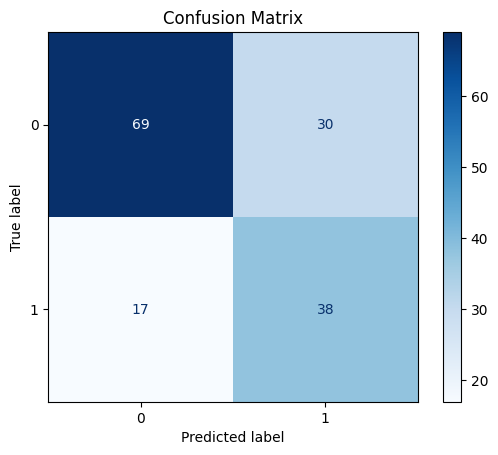

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154



In [22]:
# 1. Check Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. View the Confusion Matrix (graphical)
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 3. View the Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

**Step 8:** Visualize the Decision Tree

A key advantage of Decision Trees is their interpretability. You can visualize the trained tree to understand the decision rules it learned from the data.

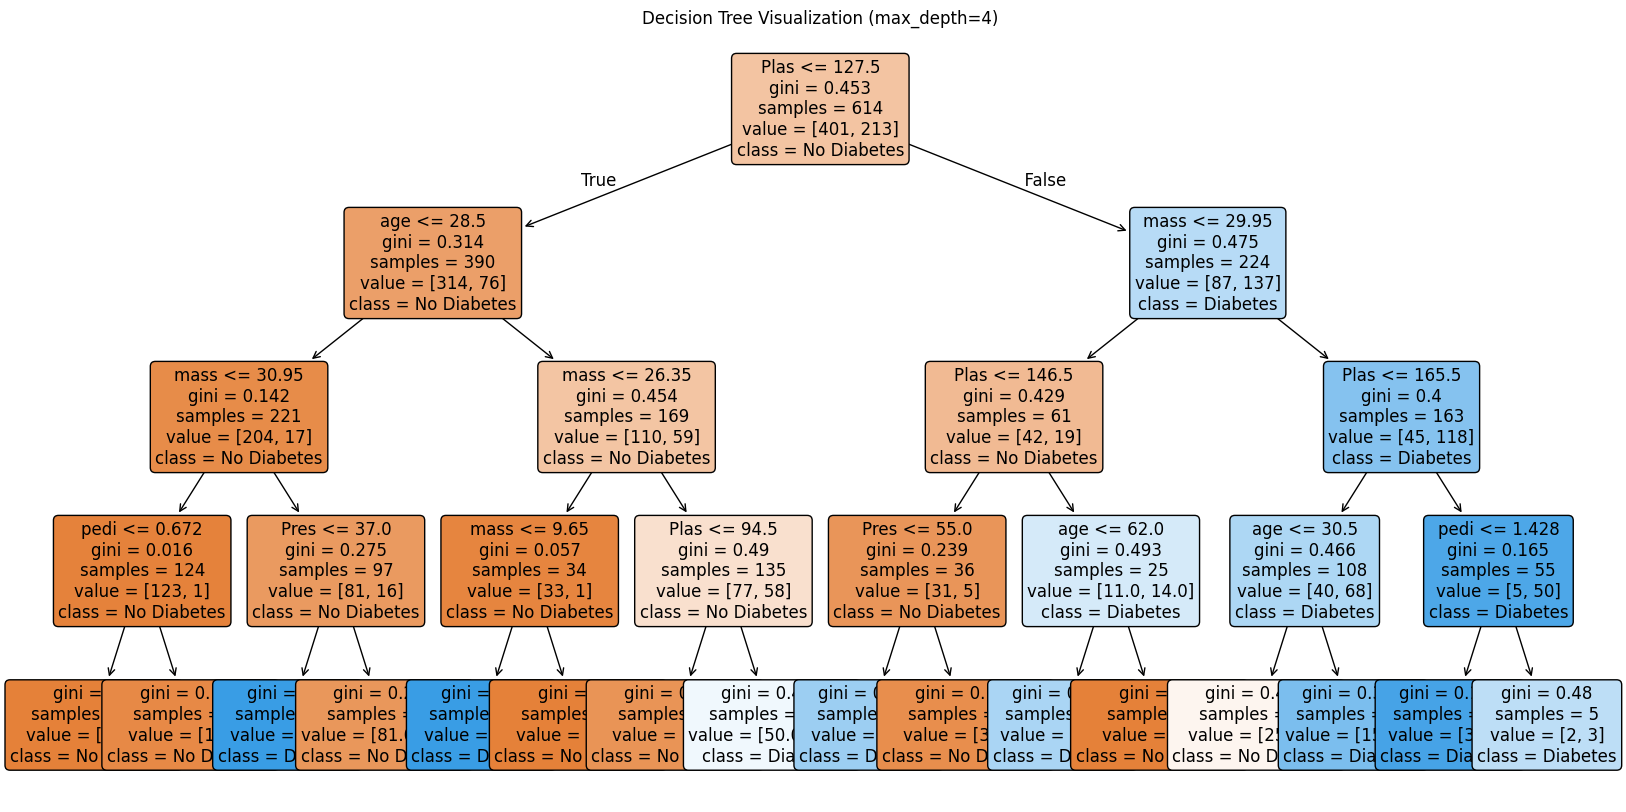

In [25]:
# Visualize the Decision Tree

# Set figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()